<h1><center>Cross Sell Prediction</center><h1> 

<h1><center><img src="https://raw.githubusercontent.com/naveenmnav/MachineLearning/main/Basic/CrossSellPrediction/Carewell-insurance-service-logo.png"/></center></h1>

---

# **Table of Contents**

---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>

  - **4.1** [**Data Acquisition**](#Section41)
  - **4.2** [**Data Description**](#Section42)
  - **4.3** [**Data Information**](#Section43)

5. [**Data Pre-Processing**](#Section5)<br>
 
  - **5.1** [**Handling of Missing Data**](#Section51)
  - **5.2** [**Handling of Redundant Data**](#Section52)
  - **5.3** [**Handling of Inconsistent Data**](#Section53)

6. [**Exploratory Data Analysis**](#Section6)<br>

7. [**Actionable Insights**](#Section7)<br>

8. [**Linear Regression**](#Section8)<br>

  - **8.1** [**Linear Regression Assumptions**](#Section81)<br>
  - **8.2** [**Data Preparation for ML**](#Section82)<br>
  - **8.3** [**Train Test Split**](#Section83)<br>
  - **8.4** [**Scaling**](#Section84)<br>
  - **8.5** [**Linear Regression**](#Section85)<br>
  - **8.6** [**Using the Model for Prediction**](#Section86)<br>
 
9. [**Model Evaluation**](#Section9)<br>

10. [**Visualize the Prediction**](#Section10)<br>

11. [**Analysis and Prediction of Unseen Test Data**](#Section11)<br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

- Carewell Insurance is into Providing General Insurance Services. Over the years the organization has transformed from the traditional manual way of doing the business to a more technologically advanced method of doing the business.
- They are a leading Insurance Company with 1 million policyholders. They provide insurance in Life Insurance, Motor insurance, Health insurance, Travel insurance, Property insurance, Mobile insurance.
- They want to build a model to predict whether the current policyholders (customers) from the past year will also be interested in additional Vehicle Insurance provided by the company.
They want to automate the prediction process based on their policyholder’s collected data.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Determining whether a policyholder who already has a policy from the company will be interested in additional Vehicle Insurance policies is a manual task.
- It solely depends upon the policyholder’s confirmation and that consumes a lot of time and resources.
- Designing a prediction model to predict whether a policyholder will be interested or not can be helpful. However, this turns out to be a bit trickier.
- Currently, the Company is keeping track of the process by contacting each policyholder and getting their feedback.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---


- This section is emphasised on installing and importing the necessary libraries that will be required.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')  


<a name = Section4></a>
# **4. Data Acquisition & Description**



This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

This database was created to identify whether a policyholder will be interested in Vehicle Insurance Policy based on the policyholder’s information.

The column Response is also present in the dataset which has two values 1 and 0 which corresponds to positive and negative responses from policyholders.

The dataset is divided into two parts: Train, and Test sets.

 **Train Set:**
- The train set contains 300000 rows and 12columns.
- The last column Response is the target variable.

**Test Set:**
- The test set contains 81109 rows and 11 columns.
- The test set doesn’t contain the Response column.
- It needs to be predicted for the test set.


- The Train Set parameters are,

|Id|Parameter Name|Description|
|:--|:--|:--|
|01 | Id                   | Unique ID for the customer |
|02 | Gender               | Gender of the customer.|
|03 | Age                  | Age of the customer |
|04 | Driving_License      | 0: Customer does not have DL, 1: Customer already has DL Region_Code: Unique code for the region of the customer |
|05 | Previously_Insured   | 1: Customer already has Vehicle Insurance, 0: Customer doesn't have Vehicle Insurance |
|06 | Vehicle_Age          | Age of the Vehicle |
|07 | Vehicle_Damage       | 1 corresponds to Customer got his/her vehicle damaged in the past. 0: Customer didn't get his/her vehicle damaged in the past |
|08 | Annual_Premium       | The amount customer needs to pay as a premium in the year |
|09 | PolicySalesChannel   | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc |
|10 | Vintage              | Location of engine in car. |
|11 | Region_Code          | Region Code |
|12 | Response             | 1: Customer is interested, 0: Customer is not interested |


- The Test Set parameters are,

|Id|Parameter Name|Description|
|:--|:--|:--|
|01 | Id                   | Unique ID for the customer |
|02 | Gender               | Gender of the customer.|
|03 | Age                  | Age of the customer |
|04 | Driving_License      | 0: Customer does not have DL, 1: Customer already has DL Region_Code: Unique code for the region of the customer |
|05 | Previously_Insured   | 1: Customer already has Vehicle Insurance, 0: Customer doesn't have Vehicle Insurance |
|06 | Vehicle_Age          | Age of the Vehicle |
|07 | Vehicle_Damage       | 1 corresponds to Customer got his/her vehicle damaged in the past. 0: Customer didn't get his/her vehicle damaged in the past |
|08 | Annual_Premium       | The amount customer needs to pay as a premium in the year |
|09 | PolicySalesChannel   | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc |
|10 | Vintage              | Location of engine in car. |
|11 | Region_Code          | Region Code |


<a name = Section41></a>
### 4.1 Data Acquisition


 

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/naveenmnav/MachineLearning/main/Basic/CrossSellPrediction/train_data.csv")

In [3]:
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Setting id as index column**

In [4]:
#dataset = dataset.set_index(keys = "id")

In [5]:
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
dataset.shape

(300000, 12)

<a name = Section42></a>
### 4.2 Data Description


 

In [7]:
dataset.describe(include = "all")

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,300000.000000,300000,300000.000000,300000.000000,300000.000000,300000.000000,300000,300000,300000.000000,300000.000000,300000.000000,300000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,162174,NaN,NaN,NaN,NaN,157678,151454,NaN,NaN,NaN,NaN
mean,150000.500000,NaN,38.815840,0.997863,26.382180,0.457947,NaN,NaN,30534.312123,112.118003,154.323843,0.122937
std,86602.684716,NaN,15.495699,0.046175,13.232431,0.498229,NaN,NaN,17247.475889,54.141651,83.643687,0.328365
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,75000.750000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24388.000000,29.000000,82.000000,0.000000
50%,150000.500000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31642.000000,133.000000,154.000000,0.000000
75%,225000.250000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39360.250000,152.000000,227.000000,0.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Gender                300000 non-null  object 
 2   Age                   300000 non-null  int64  
 3   Driving_License       300000 non-null  int64  
 4   Region_Code           300000 non-null  float64
 5   Previously_Insured    300000 non-null  int64  
 6   Vehicle_Age           300000 non-null  object 
 7   Vehicle_Damage        300000 non-null  object 
 8   Annual_Premium        300000 non-null  float64
 9   Policy_Sales_Channel  300000 non-null  float64
 10  Vintage               300000 non-null  int64  
 11  Response              300000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 27.5+ MB


<a name = Section43></a>
### **4.3 Data Information**

- In this section we will see the **information about the types of features**.

In [9]:
dataset.info(verbose=True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Gender                300000 non-null  object 
 2   Age                   300000 non-null  int64  
 3   Driving_License       300000 non-null  int64  
 4   Region_Code           300000 non-null  float64
 5   Previously_Insured    300000 non-null  int64  
 6   Vehicle_Age           300000 non-null  object 
 7   Vehicle_Damage        300000 non-null  object 
 8   Annual_Premium        300000 non-null  float64
 9   Policy_Sales_Channel  300000 non-null  float64
 10  Vintage               300000 non-null  int64  
 11  Response              300000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 73.9 MB


**Observations:**

- At high level, we can observe that there are **no missing data** in our dataset.

- There are 11 features in the dataset.

- We have 3 features that are float, 5 features that are integer and 3 features that are objects.



<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1  Handling of Redundant Data**

- In this section, we will see if any redundant data are present in the dataset.

In [10]:
print('Has the Dataset cointains any Duplicate/ Redundant values ?  ',dataset.duplicated().any())

Has the Dataset cointains any Duplicate/ Redundant values ?   False


In [11]:
dataset.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
299995    False
299996    False
299997    False
299998    False
299999    False
Length: 300000, dtype: bool

In [12]:
duplicate_dataset = dataset[dataset.duplicated()]

In [13]:
duplicate_dataset.to_csv("Duplicate.csv")

**Observations:**

- On futher analysis, we can see that these data are not duplicates. We don't need to remove these data

<a name = Section52></a>
### **5.2  Handling of Missing Data**

In [14]:
null_frame = pd.DataFrame(index = dataset.columns.values)
null_frame['Null Frequency'] = dataset.isnull().sum().values
percent = dataset.isnull().sum().values/dataset.shape[0]
null_frame['Missing Percentage'] = np.round(percent, decimals = 4) * 100
null_frame

,Null Frequency,Missing Percentage
id,0,0.0
Gender,0,0.0
Age,0,0.0
Driving_License,0,0.0
Region_Code,0,0.0
Previously_Insured,0,0.0
Vehicle_Age,0,0.0
Vehicle_Damage,0,0.0
Annual_Premium,0,0.0
Policy_Sales_Channel,0,0.0


**Observations:**

- There are no missing data in the dataset

In [15]:
dataset['Gender'].value_counts()

Male      162174
Female    137826
Name: Gender, dtype: int64

In [16]:
dataset['Age'].value_counts()

24    20435
23    18991
22    16479
25    16081
21    12963
      ...  
81       47
82       20
83       19
84       10
85       10
Name: Age, Length: 66, dtype: int64

In [17]:
dataset['Driving_License'].value_counts()

1    299359
0       641
Name: Driving_License, dtype: int64

In [18]:
dataset['Region_Code'].value_counts()

28.0    83779
8.0     26583
46.0    15516
41.0    14347
15.0    10440
30.0     9514
29.0     8615
50.0     8091
11.0     7306
3.0      7303
36.0     6886
33.0     6016
47.0     5847
35.0     5516
6.0      4986
45.0     4411
37.0     4397
18.0     4078
14.0     3689
48.0     3671
39.0     3619
10.0     3439
21.0     3294
2.0      3169
13.0     3148
7.0      2608
12.0     2530
9.0      2432
27.0     2248
32.0     2213
17.0     2094
43.0     2082
26.0     2061
25.0     1989
24.0     1913
0.0      1610
16.0     1605
38.0     1602
23.0     1543
31.0     1542
20.0     1536
49.0     1459
4.0      1423
34.0     1299
19.0     1216
22.0     1043
40.0     1043
5.0      1021
1.0       787
44.0      626
42.0      481
52.0      196
51.0      138
Name: Region_Code, dtype: int64

In [19]:
dataset['Previously_Insured'].value_counts()

0    162616
1    137384
Name: Previously_Insured, dtype: int64

In [20]:
dataset['Vehicle_Age'].value_counts()

1-2 Year     157678
< 1 Year     129707
> 2 Years     12615
Name: Vehicle_Age, dtype: int64

In [21]:
dataset['Vehicle_Damage'].value_counts()

Yes    151454
No     148546
Name: Vehicle_Damage, dtype: int64

In [22]:
dataset['Annual_Premium'].value_counts()

2630.0      51243
69856.0       113
49324.0        30
45179.0        29
39008.0        29
            ...  
19501.0         1
130427.0        1
75177.0         1
68216.0         1
55615.0         1
Name: Annual_Premium, Length: 46133, dtype: int64

In [23]:
dataset['Policy_Sales_Channel'].value_counts()

152.0    106033
26.0      62519
124.0     58466
160.0     17099
156.0      8495
          ...  
33.0          1
84.0          1
123.0         1
75.0          1
144.0         1
Name: Policy_Sales_Channel, Length: 153, dtype: int64

In [24]:
dataset['Vintage'].value_counts()

73     1136
256    1125
63     1108
92     1108
158    1107
       ... 
32      972
181     971
48      969
89      969
235     965
Name: Vintage, Length: 290, dtype: int64

In [25]:
dataset['Response'].value_counts()

0    263119
1     36881
Name: Response, dtype: int64

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

<a name = Section61></a>
**<h4>Question:** What is the gender distribution of the Policyholders ?</h4>

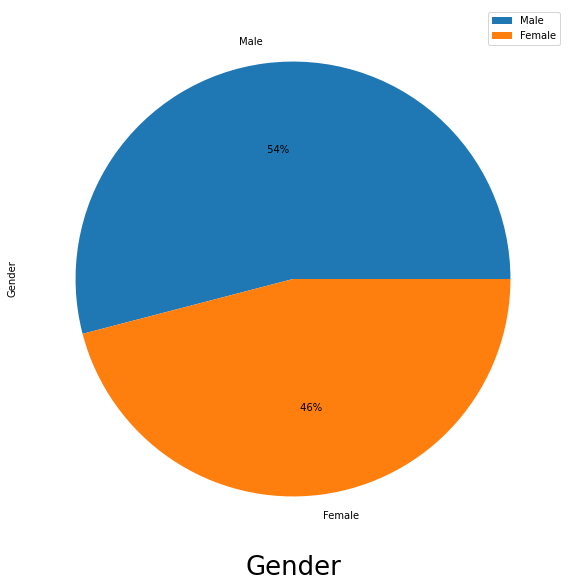

In [26]:
fig = plt.figure(figsize = (10, 10))

dataset['Gender'].value_counts().plot(kind='pie', autopct = '%3.0f%%',legend=True)
plt.xlabel(xlabel='Gender', fontsize=26)
plt.show()

<a name = Section62></a>
**<h4>Question:** What is the age distribution of the Policyholders?</h4>

In [27]:
dataset.describe(include ="all")

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,300000.000000,300000,300000.000000,300000.000000,300000.000000,300000.000000,300000,300000,300000.000000,300000.000000,300000.000000,300000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,162174,NaN,NaN,NaN,NaN,157678,151454,NaN,NaN,NaN,NaN
mean,150000.500000,NaN,38.815840,0.997863,26.382180,0.457947,NaN,NaN,30534.312123,112.118003,154.323843,0.122937
std,86602.684716,NaN,15.495699,0.046175,13.232431,0.498229,NaN,NaN,17247.475889,54.141651,83.643687,0.328365
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,75000.750000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24388.000000,29.000000,82.000000,0.000000
50%,150000.500000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31642.000000,133.000000,154.000000,0.000000
75%,225000.250000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39360.250000,152.000000,227.000000,0.000000


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Gender                300000 non-null  object 
 2   Age                   300000 non-null  int64  
 3   Driving_License       300000 non-null  int64  
 4   Region_Code           300000 non-null  float64
 5   Previously_Insured    300000 non-null  int64  
 6   Vehicle_Age           300000 non-null  object 
 7   Vehicle_Damage        300000 non-null  object 
 8   Annual_Premium        300000 non-null  float64
 9   Policy_Sales_Channel  300000 non-null  float64
 10  Vintage               300000 non-null  int64  
 11  Response              300000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 27.5+ MB


In [29]:
dataset['Gender'].value_counts()

Male      162174
Female    137826
Name: Gender, dtype: int64

In [30]:
dataset.replace({'Gender':{'Male':0, 'Female':1}}, inplace = True)

In [31]:
dataset['Vehicle_Age'].value_counts()

1-2 Year     157678
< 1 Year     129707
> 2 Years     12615
Name: Vehicle_Age, dtype: int64

In [32]:
dataset.replace({'Vehicle_Age':{'1-2 Year':0, '< 1 Year':1, '> 2 Years':2}}, inplace = True)

In [33]:
dataset['Vehicle_Damage'].value_counts()

Yes    151454
No     148546
Name: Vehicle_Damage, dtype: int64

In [34]:
dataset.replace({'Vehicle_Damage':{'Yes':0, 'No':1}}, inplace = True)

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Gender                300000 non-null  int64  
 2   Age                   300000 non-null  int64  
 3   Driving_License       300000 non-null  int64  
 4   Region_Code           300000 non-null  float64
 5   Previously_Insured    300000 non-null  int64  
 6   Vehicle_Age           300000 non-null  int64  
 7   Vehicle_Damage        300000 non-null  int64  
 8   Annual_Premium        300000 non-null  float64
 9   Policy_Sales_Channel  300000 non-null  float64
 10  Vintage               300000 non-null  int64  
 11  Response              300000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 27.5 MB


## Standardization

In [36]:
X = dataset.iloc[:,:-1]
y = dataset['Response']

In [37]:
y

0         1
1         0
2         1
3         0
4         0
         ..
299995    0
299996    0
299997    0
299998    0
299999    0
Name: Response, Length: 300000, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
y

0         1
1         0
2         1
3         0
4         0
         ..
299995    0
299996    0
299997    0
299998    0
299999    0
Name: Response, Length: 300000, dtype: int64

<a name = Section7></a>
## 7. Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

In [42]:
X_train.shape

(210000, 11)

In [43]:
X_test.shape

(90000, 11)

In [44]:
y_train.shape

(210000,)

In [45]:
y_test.shape

(90000,)

<a name = Section8></a>

---
# **8. Logistic Regression**
---


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr_model = LogisticRegression()

In [48]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [49]:
lr_pred_train = lr_model.predict(X_train)

In [50]:
lr_pred_test = lr_model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
print('Accuracy score for test data is:', accuracy_score(y_test,lr_pred_test))

Accuracy score for test data is: 0.8764555555555555


In [53]:
print('Accuracy score for test data is:', accuracy_score(y_train,lr_pred_train))

Accuracy score for test data is: 0.8773238095238095


<a name = Section9></a>
## 9. Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_clf = RandomForestClassifier(random_state=30, class_weight='balanced')
rf_clf.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count = rf_clf.predict(X_train)
y_test_pred_count = rf_clf.predict(X_test)

In [56]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_test_pred_count))

Accuracy score for test data is: 0.8718222222222223


In [57]:
print('Accuracy score for train data is:', accuracy_score(y_train,y_train_pred_count))

Accuracy score for train data is: 0.9999857142857143


<a name = Section10></a>
### 10. K-Neighbors Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knc_clf = KNeighborsClassifier()

knc_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
knc_y_pred_train = knc_clf.predict(X_train)
knc_y_pred_test = knc_clf.predict(X_test)

In [60]:
print('Accuracy score for test data is:', accuracy_score(y_test,knc_y_pred_test))

Accuracy score for test data is: 0.8648555555555556


In [61]:
print('Accuracy score for train data is:', accuracy_score(y_train,knc_y_pred_train))

Accuracy score for train data is: 0.8811142857142857


#### The most accurate model is Logistic Regression

In [62]:
data_test = pd.read_csv("https://raw.githubusercontent.com/naveenmnav/MachineLearning/main/Basic/CrossSellPrediction/test_data.csv")

In [63]:
data_test.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
count,81109.000000,81109,81109.000000,81109.000000,81109.000000,81109.000000,81109,81109,81109.000000,81109.000000,81109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN
freq,NaN,43915,NaN,NaN,NaN,NaN,42638,40959,NaN,NaN,NaN
mean,340555.000000,NaN,38.847526,0.997892,26.413320,0.459185,NaN,NaN,30675.637870,111.724679,154.434514
std,23414.295829,NaN,15.570393,0.045868,13.220532,0.498334,NaN,NaN,17085.258257,54.433184,83.773828
min,300001.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000
25%,320278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24462.000000,26.000000,82.000000
50%,340555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31761.000000,133.000000,155.000000
75%,360832.000000,NaN,50.000000,1.000000,35.000000,1.000000,NaN,NaN,39560.000000,152.000000,227.000000


In [64]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81109 entries, 0 to 81108
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81109 non-null  int64  
 1   Gender                81109 non-null  object 
 2   Age                   81109 non-null  int64  
 3   Driving_License       81109 non-null  int64  
 4   Region_Code           81109 non-null  float64
 5   Previously_Insured    81109 non-null  int64  
 6   Vehicle_Age           81109 non-null  object 
 7   Vehicle_Damage        81109 non-null  object 
 8   Annual_Premium        81109 non-null  float64
 9   Policy_Sales_Channel  81109 non-null  float64
 10  Vintage               81109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 6.8+ MB


In [65]:
data_test.replace({'Gender':{'Male':0, 'Female':1}}, inplace = True)

data_test.replace({'Vehicle_Age':{'1-2 Year':0, '< 1 Year':1, '> 2 Years':2}}, inplace = True)

data_test.replace({'Vehicle_Damage':{'Yes':0, 'No':1}}, inplace = True)


In [66]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81109 entries, 0 to 81108
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81109 non-null  int64  
 1   Gender                81109 non-null  int64  
 2   Age                   81109 non-null  int64  
 3   Driving_License       81109 non-null  int64  
 4   Region_Code           81109 non-null  float64
 5   Previously_Insured    81109 non-null  int64  
 6   Vehicle_Age           81109 non-null  int64  
 7   Vehicle_Damage        81109 non-null  int64  
 8   Annual_Premium        81109 non-null  float64
 9   Policy_Sales_Channel  81109 non-null  float64
 10  Vintage               81109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 6.8 MB


In [67]:
y_unseen_pred = lr_model.predict(data_test)

In [68]:
y_unseen_pred.shape

(81109,)

In [69]:
y_unseen_pred_series = pd.Series(y_unseen_pred)

In [70]:
y_unseen_pred_df = pd.DataFrame(y_unseen_pred_series)

In [71]:
dataset['Response'].value_counts()

0    263119
1     36881
Name: Response, dtype: int64

In [72]:
dataset.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,-0.001276,0.001351,-0.001214,-0.001590,0.002779,-0.001915,0.002823,0.001183,-0.000872,-0.001208,0.000681
Gender,-0.001276,1.000000,-0.145201,0.018033,0.000726,0.080161,0.113333,0.089847,-0.002983,0.110602,0.001455,-0.051981
Age,0.001351,-0.145201,1.000000,-0.079920,0.042627,-0.254640,-0.522076,-0.267059,0.066565,-0.576893,0.000817,0.110922
Driving_License,-0.001214,0.018033,-0.079920,1.000000,-0.001555,0.014568,0.029992,0.015795,-0.011593,0.043951,-0.000482,0.009850
Region_Code,-0.001590,0.000726,0.042627,-0.001555,1.000000,-0.024411,-0.027852,-0.028716,-0.010025,-0.042550,-0.002597,0.009845
Previously_Insured,0.002779,0.080161,-0.254640,0.014568,-0.024411,1.000000,0.174261,0.824224,0.005007,0.219195,0.000624,-0.341534
Vehicle_Age,-0.001915,0.113333,-0.522076,0.029992,-0.027852,0.174261,1.000000,0.173159,0.024840,0.386406,-0.000065,-0.104125
Vehicle_Damage,0.002823,0.089847,-0.267059,0.015795,-0.028716,0.824224,0.173159,1.000000,-0.009639,0.224012,0.000136,-0.354638
Annual_Premium,0.001183,-0.002983,0.066565,-0.011593,-0.010025,0.005007,0.024840,-0.009639,1.000000,-0.112268,0.000890,0.023209
Policy_Sales_Channel,-0.000872,0.110602,-0.576893,0.043951,-0.042550,0.219195,0.386406,0.224012,-0.112268,1.000000,-0.002438,-0.140574


In [76]:
y_unseen_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
submission = pd.DataFrame({'Id':data_test['id'],'winner':y_unseen_pred_df[0]})

In [78]:
submission.to_csv('submission.csv', index=False, header=False)